# Importing Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data

In [2]:
path = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

# Distributing data in positive and negative results.

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Downloads/Brain Tumor Detection with Data Science and ML/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])



In [10]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
np.unique(Y) , X.shape            

(array([0, 1]), (1222, 200, 200))

In [11]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [12]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

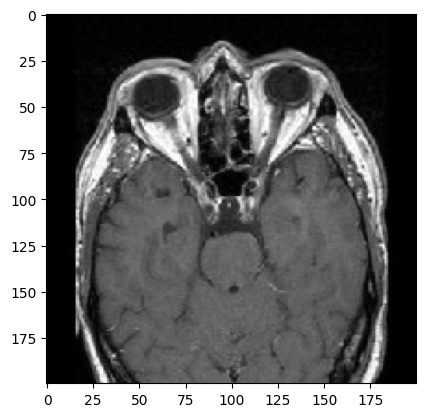

In [13]:
plt.imshow(X[0], cmap='gray')

In [14]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [16]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [17]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [18]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [19]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [21]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [22]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [23]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [24]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [25]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


In [26]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

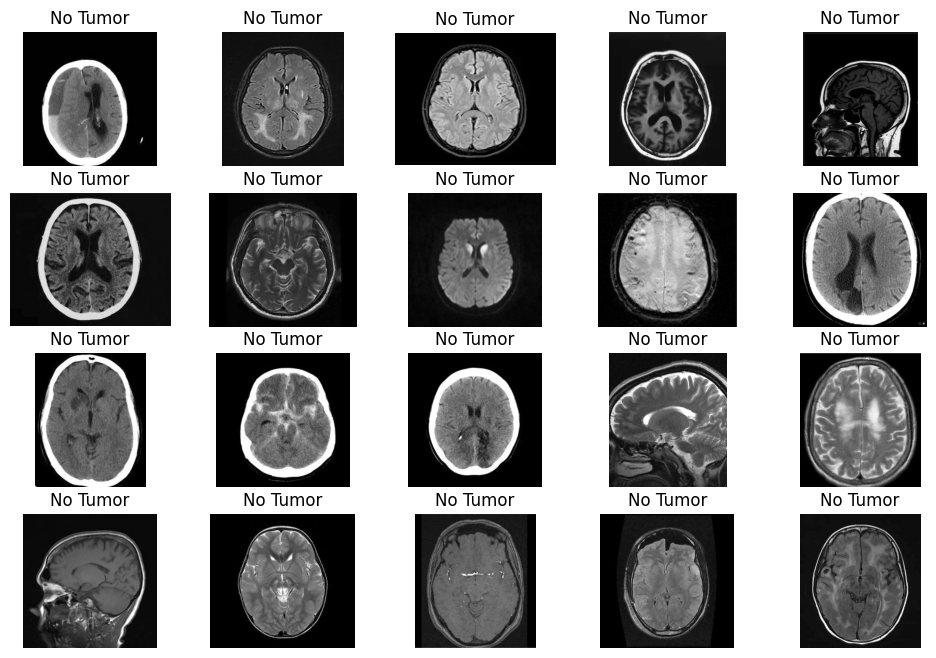

In [45]:
plt.figure(figsize=(12,8))
p = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/')
c=1
for i in os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/')[:20]:
    plt.subplot(4,5,c)
    img = cv2.imread('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

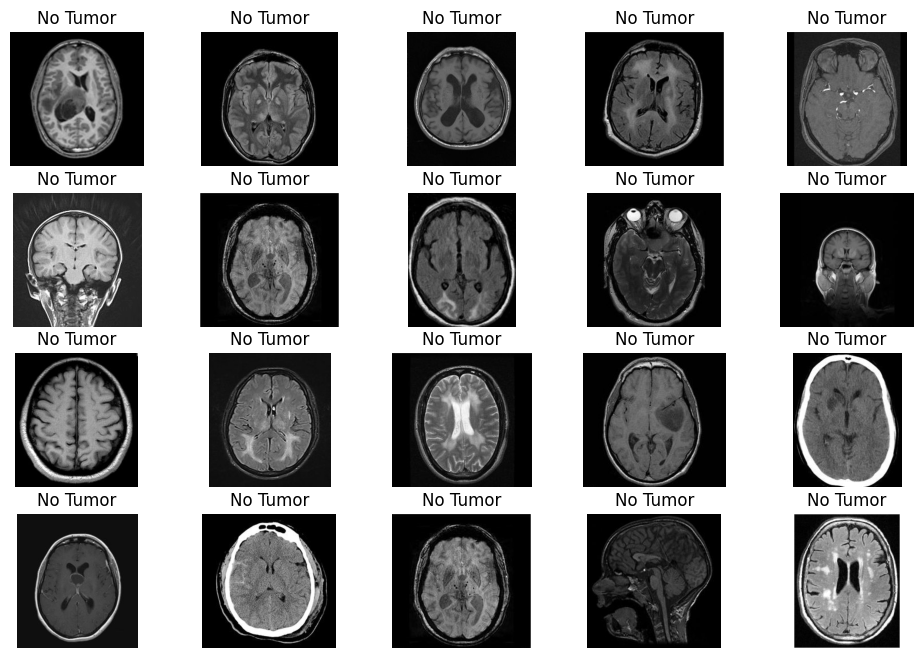

In [46]:
plt.figure(figsize=(12,8))
p = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/')
c=1
for i in os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/')[20:40]:
    plt.subplot(4,5,c)
    img = cv2.imread('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

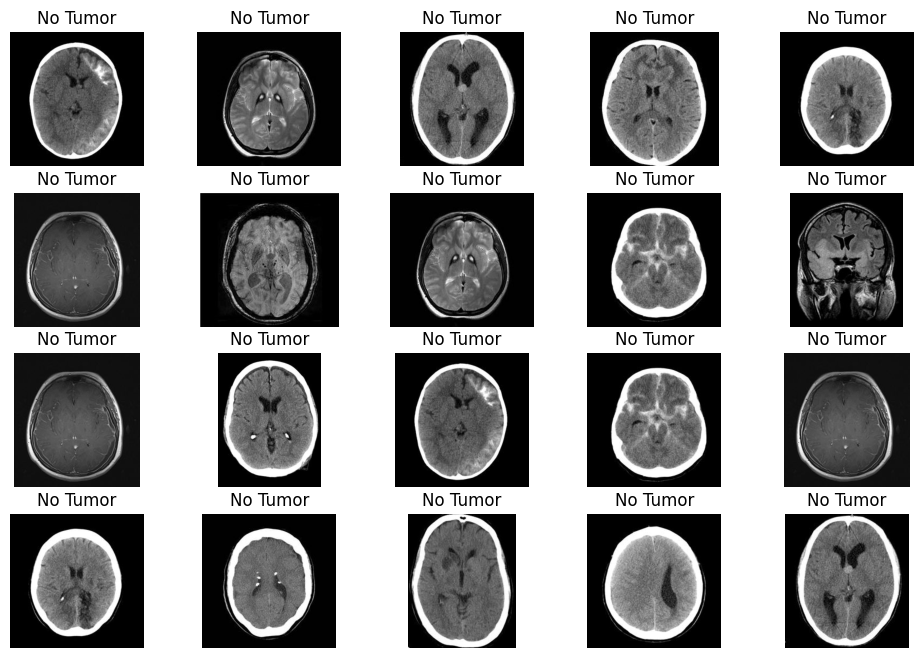

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/')
c=1
for i in os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/')[40:60]:
    plt.subplot(4,5,c)
    img = cv2.imread('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

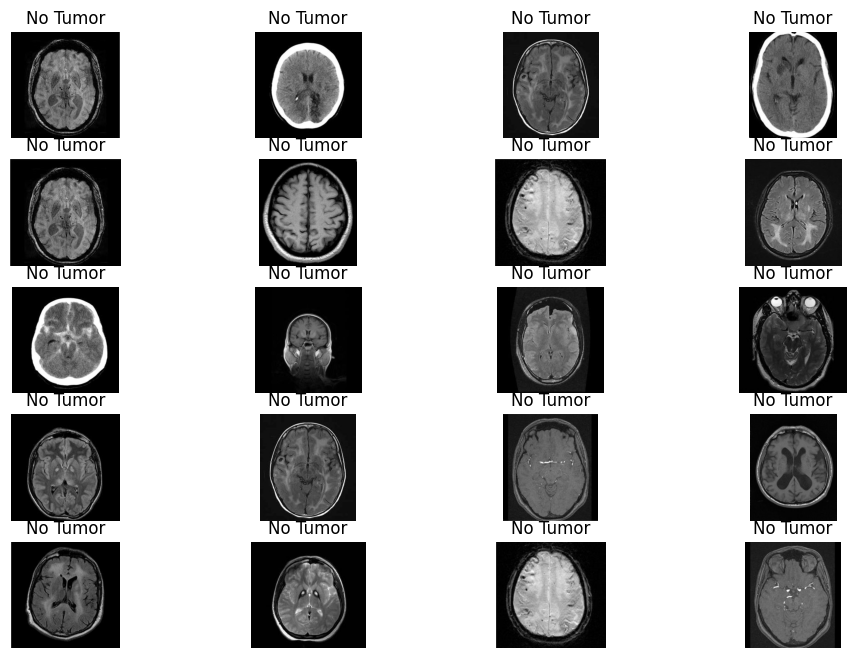

In [48]:
plt.figure(figsize=(12,8))
p = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/')
c=1
for i in os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/')[60:80]:
    plt.subplot(5,4,c)
    img = cv2.imread('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

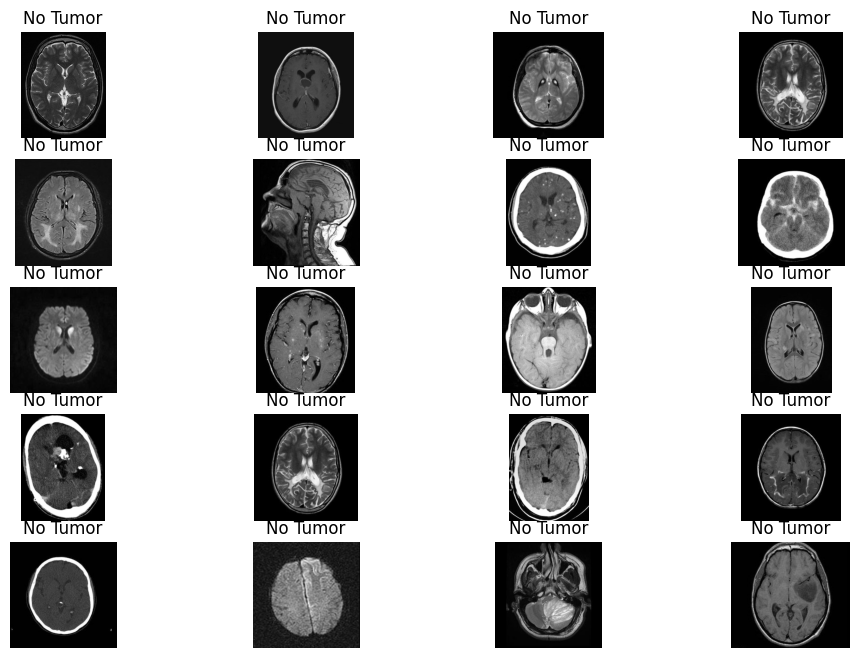

In [49]:
plt.figure(figsize=(12,8))
p = os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/')
c=1
for i in os.listdir('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/')[80:100]:
    plt.subplot(5,4,c)
    img = cv2.imread('Downloads/Brain Tumor Detection with Data Science and ML/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1